In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:

#data set 
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])


dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print (dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


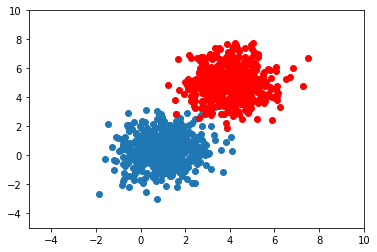

In [6]:
#plotting of data
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='red')
plt.show()

In [8]:

#total no rows for combining data
r = dist_01.shape[0] + dist_02.shape[0]
# 1 extra column for adding labels
c = dist_01.shape[1] + 1
# new blank array
data = np.zeros((r, c))
print (data.shape)

#adding data
data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
#adding labels
data[dist_01.shape[0]:, -1] = 1.0

print (data.mean(axis=0))

(1000, 3)
[2.49358691 2.69037876 0.5       ]


In [9]:
#shuffling dataset values
np.random.shuffle(data)
print (data[:10])

[[ 3.46863477  4.49259654  1.        ]
 [-0.46536752  0.0424877   0.        ]
 [ 3.84697728  3.32396225  1.        ]
 [-0.64233881 -0.20201859  0.        ]
 [ 1.65428983 -2.20838104  0.        ]
 [ 2.43064205 -1.88863648  0.        ]
 [ 2.44595134  2.5235789   0.        ]
 [ 4.67691223  5.92253794  1.        ]
 [ 2.25752778  6.73151337  1.        ]
 [ 2.11111579 -0.77192405  0.        ]]


In [13]:
def distance(x1, x2):
    # euclidean distance
    d = np.sqrt(((x1-x2)**2).sum())
    return d

def knn(X_train, y_train, xt, k=7):
    vals = []
    for ix in range(X_train.shape[0]):
        d = distance(X_train[ix], xt)
        vals.append([d, y_train[ix]])
    sorted_labels = sorted(vals, key=lambda z: z[0])
    # storing first k nearest values 
    neighbours = np.asarray(sorted_labels)[:k, -1]
    # counting frequency of unique labels
    freq = np.unique(neighbours, return_counts=True)
    
    return freq[0][freq[1].argmax()]

In [12]:

test_point = np.array([8, -4])

print (knn(data[:, :2], data[:, -1], test_point))

0.0


In [17]:
np.random.shuffle(data)
split = int(0.25 * data.shape[0])
# splitting of data into training and testing part
train_data_X = data[:split, :2]
train_data_y = data[:split, -1]
test_data_X = data[split:, :2]
test_data_y = data[split:, -1]

print (train_data_X.shape, train_data_y.shape)
print (test_data_X.shape, test_data_y.shape)

(250, 2) (250,)
(750, 2) (750,)


In [18]:
def get_acc(kx):
    #empty list for storing predictions
    preds = []
    # predict value of every test point
    for ix in range(test_data_X.shape[0]):
        preds.append(knn(train_data_X, train_data_y, test_data_X[ix], k=kx))

        
    preds = np.asarray(preds)
    #comparing predicted value with actual value
    return 100*float((test_data_y == preds).sum())/preds.shape[0]

print (get_acc(7))

99.6


In [19]:
# accuracy for different k values from 2 to 19
for ix in range(2, 20):
    print ("k:", ix, "| Acc:", get_acc(ix))

k: 2 | Acc: 99.46666666666667
k: 3 | Acc: 99.46666666666667
k: 4 | Acc: 99.33333333333333
k: 5 | Acc: 99.46666666666667
k: 6 | Acc: 99.46666666666667
k: 7 | Acc: 99.6
k: 8 | Acc: 99.46666666666667
k: 9 | Acc: 99.46666666666667
k: 10 | Acc: 99.33333333333333
k: 11 | Acc: 99.33333333333333
k: 12 | Acc: 99.33333333333333
k: 13 | Acc: 99.33333333333333
k: 14 | Acc: 99.33333333333333
k: 15 | Acc: 99.33333333333333
k: 16 | Acc: 99.33333333333333
k: 17 | Acc: 99.46666666666667
k: 18 | Acc: 99.46666666666667
k: 19 | Acc: 99.46666666666667
